# Visualizing




In [1]:
%matplotlib inline
import altair as alt
import pandas as pd
from pathlib import Path

alt.renderers.enable('notebook')

DEST_DIR = Path('./figures')
SRC_PATH = Path('../data/wrangled', 'nasa-co2-temps.csv')

YEAR_SPAN = (1880,2020)
YEAR_AX = alt.X('year:Q', 
                scale=alt.Scale(domain=YEAR_SPAN),
                axis=alt.Axis(format='d'))

charts = {}

In [2]:
df = pd.read_csv(SRC_PATH, index_col=False)
df = df.astype({'year': 'int'})
df.tail()

,year,surface_air_temp_anomaly,co2_ppm
134,2014,0.86,398.6
135,2015,0.97,400.8
136,2016,1.23,404.2
137,2017,1.13,406.6
138,2018,1.05,408.5


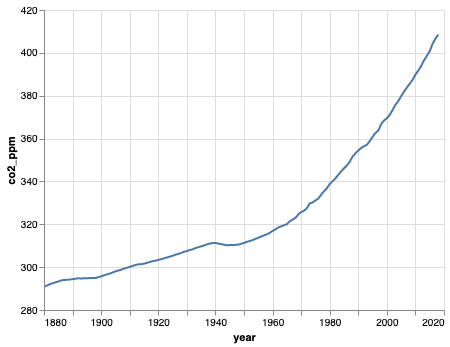

In [3]:
charts['co2-vs-time'] = alt.Chart(df).mark_line().encode(
    x=YEAR_AX,
    y=alt.Y('co2_ppm:Q', scale=alt.Scale(domain=(280, 420))),
)

charts['co2-vs-time']

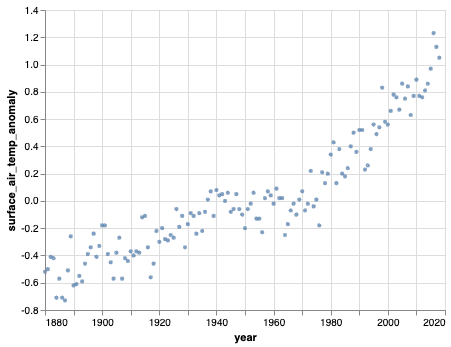

In [4]:
charts['temp-vs-time'] = alt.Chart(df).mark_point(size=5).encode(
    x=YEAR_AX,
    y='surface_air_temp_anomaly'
)
charts['temp-vs-time']

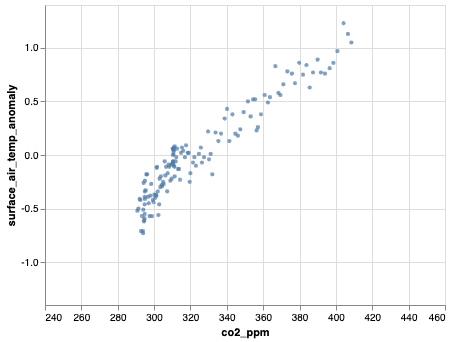

In [5]:
charts['c02-vs-temp'] = alt.Chart(df).mark_point(size=5).encode(
    x=alt.X('co2_ppm', scale=alt.Scale(domain=(250, 450))),
    y=alt.Y('surface_air_temp_anomaly', scale=alt.Scale(domain=(-1.4, 1.4))),
)
charts['c02-vs-temp']

In [7]:
# saving to disk
DEST_DIR.mkdir(exist_ok=True, parents=True)
for name, ch in charts.items():
    dest = str(DEST_DIR / f"global-{name}.png")
    ch.save(dest)


WebDriverException: Message: Service chromedriver unexpectedly exited. Status code was: 127
